Problem Statement- The goal of every supermarket is to make a profit. This is achieved when more goods are sold and the turnover is high. A major challenge to increasing sales of a supermarket lies in the ability of the manager to forecast sales patterns and know readily beforehand when to order and replenish inventories as well as plan for manpower and staff. The amount of sales data has steadily been on the increase in recent years and the ability to leverage this gold of data separates high-performing supermarkets from the others. One of the most valuable assets a supermarket can have is data generated by customers as they interact with various supermarkets. 
Within these data, lies important patterns and variables that can be used by superstores to plan business strategies. Find out some interesting insights from the data provided to you and make a dashboard using any BI tool (such as Tableau, Power BI, etc). Make a summary report based on your analysis.


In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pgeocode
import warnings
warnings.filterwarnings('ignore')

In [27]:
data=pd.read_excel('Superstore.xlsx')

In [4]:
data.shape

(9994, 21)

In [41]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,US,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2019-119914,2019-05-04,2019-05-09,Second Class,CC-12220,Chris Cortes,Consumer,US,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1236
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       630
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [12]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [14]:
bool_series = pd.isnull(data["Postal Code"])
data[bool_series]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2019-104066,2019-12-05,2019-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,US,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2017-162887,2017-11-07,2017-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,US,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2018-150140,2018-04-06,2018-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,US,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,US,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,US,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2018-165505,2018-01-23,2018-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,US,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,US,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,US,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,US,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2019-127292,2019-01-19,2019-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,US,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


We observe that Postal code of Burlington is missing.

In [15]:
data["Postal Code"].fillna("46915",inplace = True)
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,US,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,US,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [16]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Now, we can observe that there ain't any null value.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Performing univariate analysis- Countplots,scatterplots,histograms,lineplots.

<AxesSubplot:xlabel='Category', ylabel='count'>

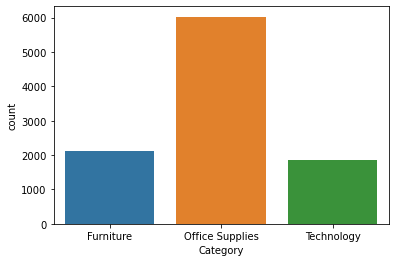

In [18]:
sns.countplot(x='Category',data=data)

Office suplies was the most recurrent among all categories.

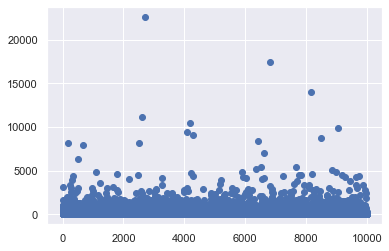

In [91]:
plt.scatter(data.index,data['Sales'])
plt.show()

The data is imabalanced and there are outliers in it that may cause variability in output.

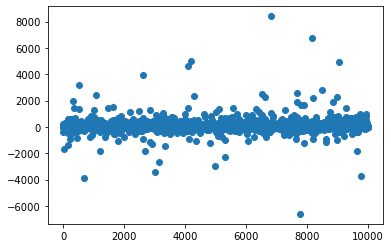

In [21]:
plt.scatter(data.index,data['Profit'])
plt.show()

(array([1620.,    0.,    0., 3203.,    0.,    0., 2323.,    0.,    0.,
        2848.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

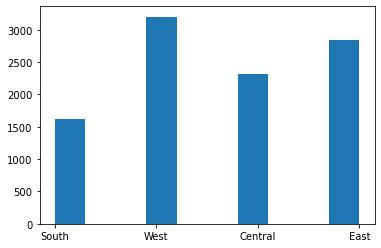

In [28]:
plt.hist(data['Region'])

West region is the most recurrent.

(array([4798.,  146., 3657.,  227.,   27.,  217.,   66.,  138.,  418.,
         300.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ]),
 <BarContainer object of 10 artists>)

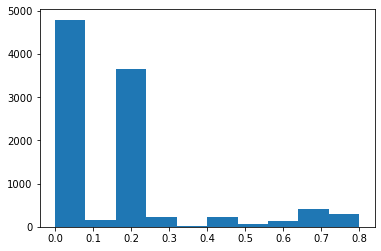

In [74]:
plt.hist(data['Discount'])

Most of the customers didn't get any discount.

(array([3301., 2409., 1191., 1802.,  606.,  257.,  315.,   34.,   23.,
          56.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

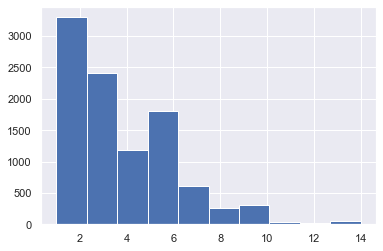

In [93]:
plt.hist(data['Quantity'])

2 was the most recurrent among quantities.

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

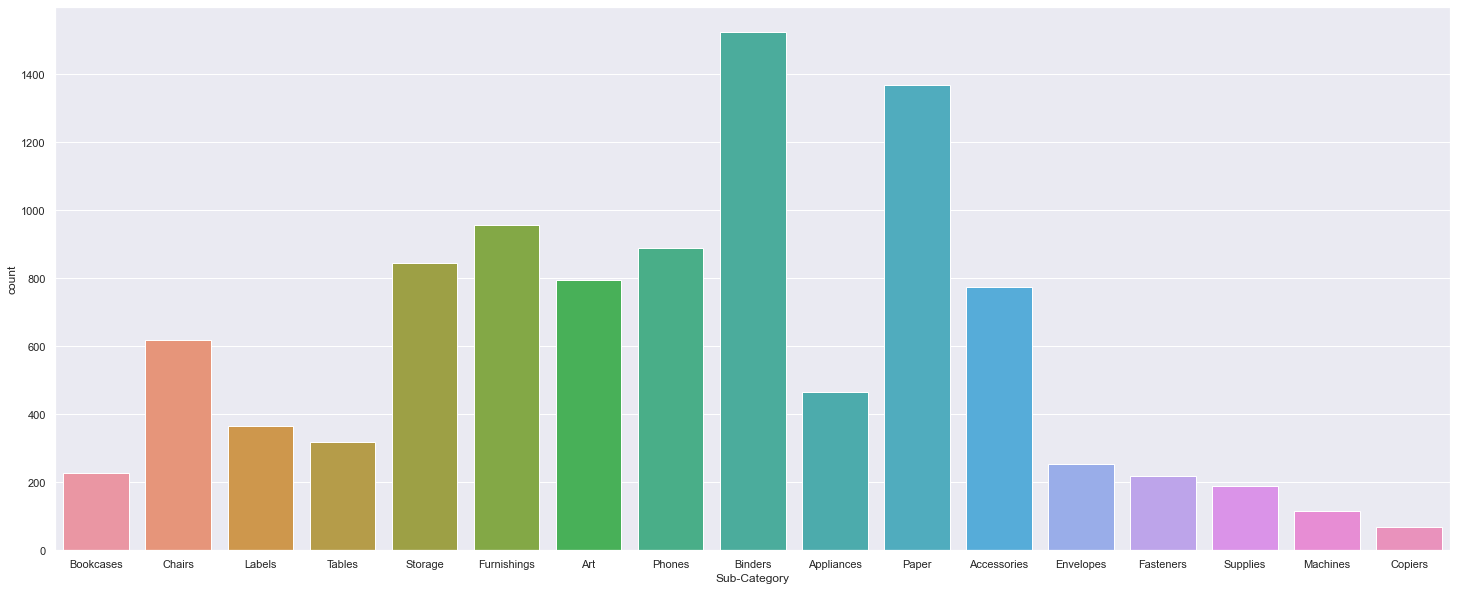

In [33]:
plt.figure(figsize=(25,10))
sns.countplot(data['Sub-Category'])


Binders- the most recurrent among sub-category

<AxesSubplot:xlabel='Sales', ylabel='Density'>

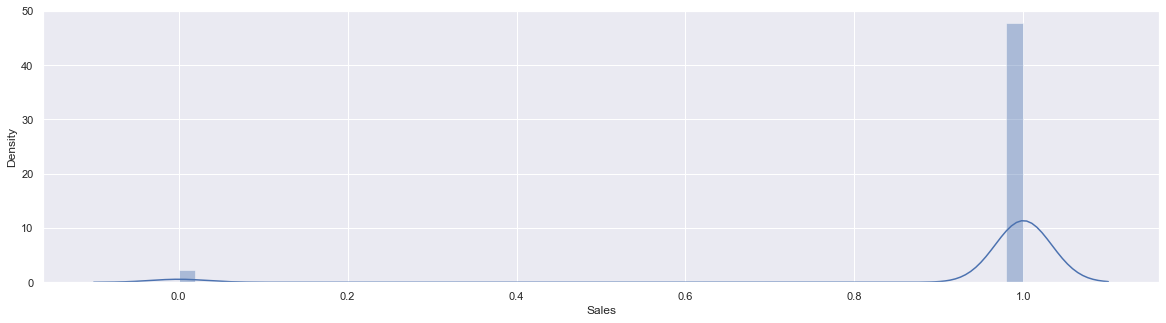

In [101]:
plt.figure(figsize = (20, 5))
sns.distplot(data['Sales']<1000)

Sales around 1000 have the highest density.

<AxesSubplot:xlabel='Discount', ylabel='Density'>

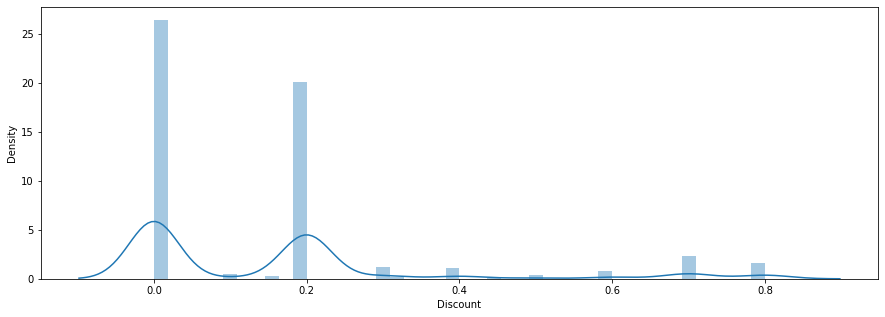

In [54]:
plt.figure(figsize =(15, 5))
sns.distplot(data['Discount'])

Sales with discount 0% have the most density followed by 0.2%

<AxesSubplot:xlabel='Profit', ylabel='Density'>

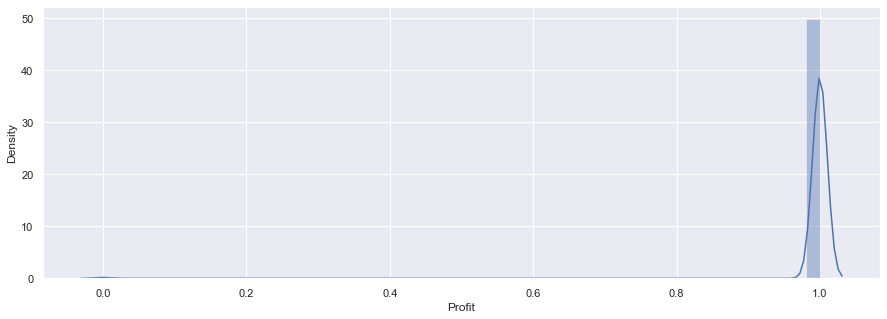

In [103]:
plt.figure(figsize = (15, 5))
sns.distplot(data['Profit']<1000)

 Most number of sales made profit around 100.

Text(0.5, 0, 'Sales')

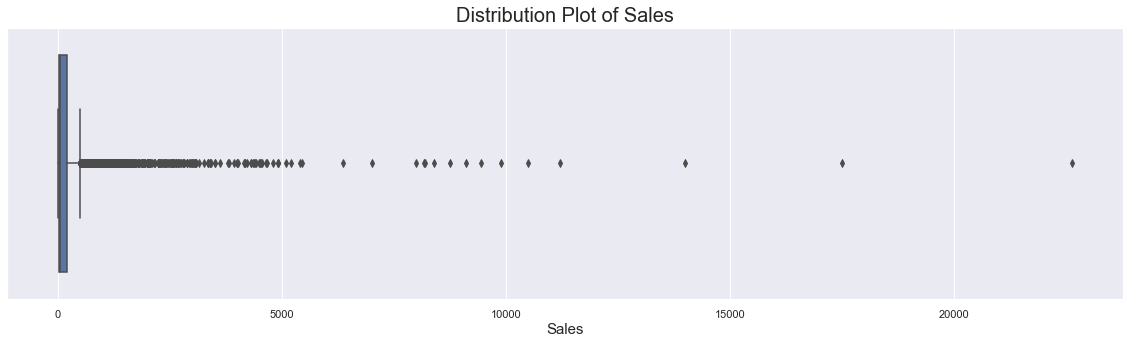

In [31]:
plt.figure(figsize = (20,5))
sns.boxplot(data['Sales'])
plt.title('Distribution Plot of Sales', fontsize = 20)
plt.xlabel('Sales', fontsize = 15)

Highly unbalanced data with many outliers.

Text(0.5, 0, 'Profit')

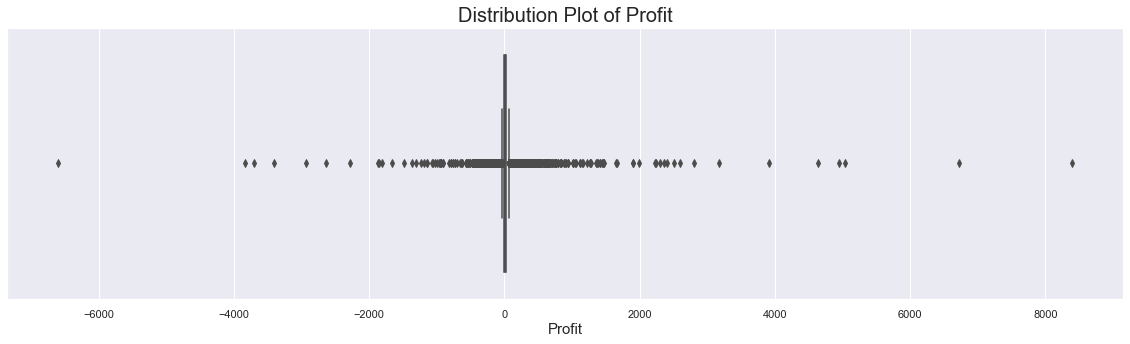

In [30]:
plt.figure(figsize = (20,5))
sns.boxplot(data['Profit'])
plt.title('Distribution Plot of Profit', fontsize = 20)
plt.xlabel('Profit', fontsize = 15)

Highly unbalanced data with many outliers.

Text(0.5, 0, 'Discount')

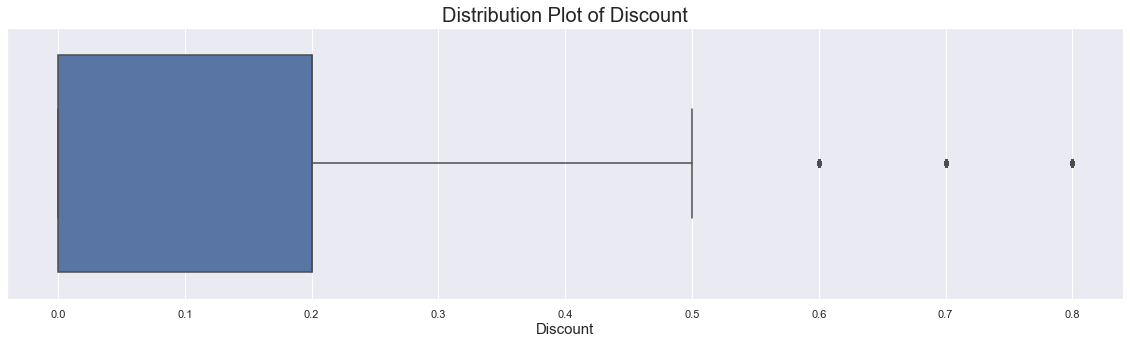

In [29]:
plt.figure(figsize = (20,5))
sns.boxplot(data['Discount'])
plt.title('Distribution Plot of Discount', fontsize = 20)
plt.xlabel('Discount', fontsize = 15)

Median discount- 0.1

Text(0.5, 0, 'Quantity')

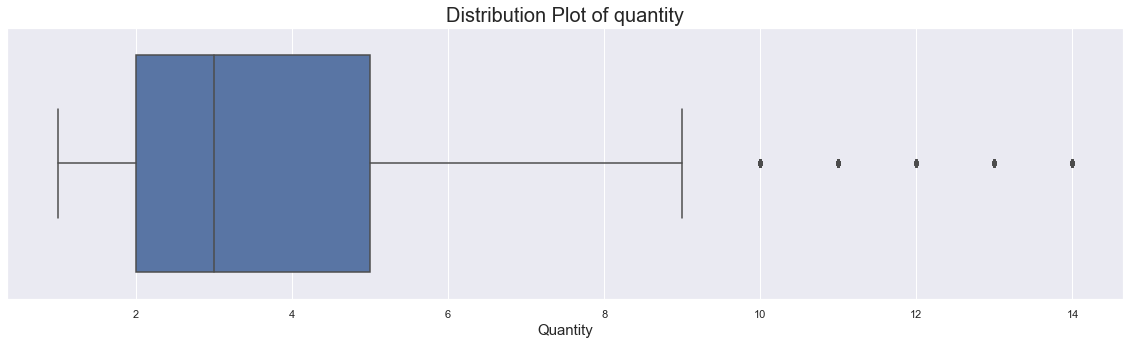

In [28]:
plt.figure(figsize = (20,5))
sns.boxplot(data['Quantity'])
plt.title('Distribution Plot of quantity', fontsize = 20)
plt.xlabel('Quantity', fontsize = 15)

Median quantuty lies around 3

<Figure size 2160x1440 with 0 Axes>

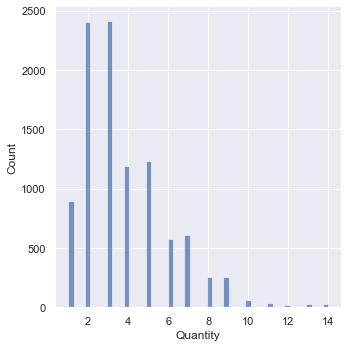

In [23]:
plt.figure(figsize=(30,20))
sns.displot(data=data['Quantity'])

Most of the sales were made with quanity 2-3

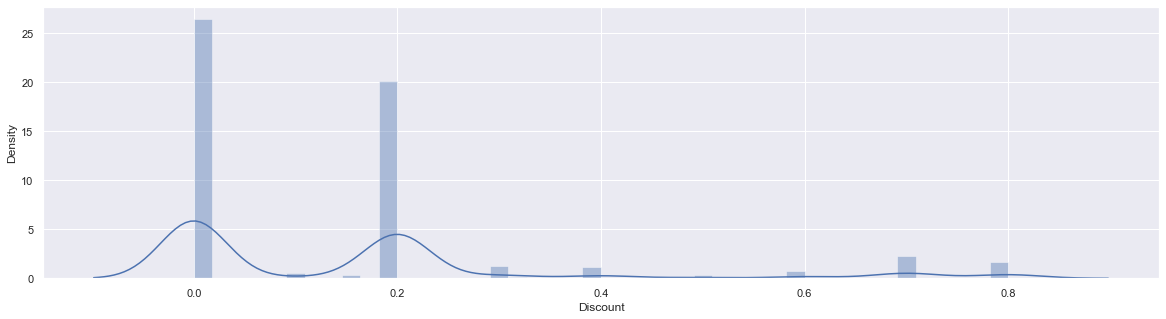

In [35]:
sns.set_theme(); np.random.seed(0)
x = data['Discount']
plt.figure(figsize=(20,5))
ax = sns.distplot(x)

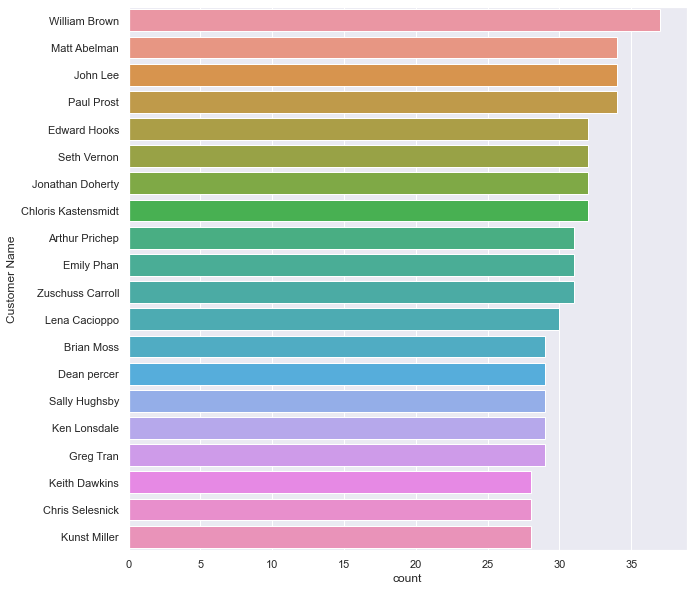

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Customer Name'],order=(data['Customer Name'].value_counts().head(20).index))
plt.show()

William Brown- Most loyal customer

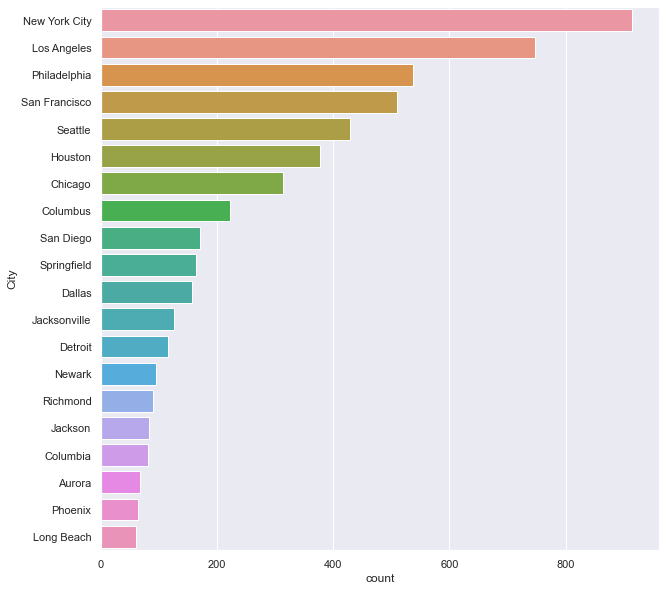

In [105]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['City'],order=(data['City'].value_counts().head(20).index))
plt.show()

Most number of sales made in New York City.

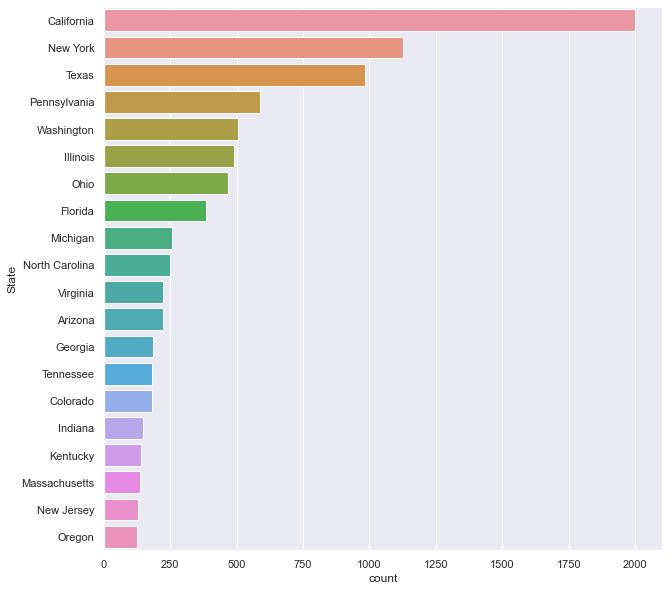

In [106]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['State'],order=(data['State'].value_counts().head(20).index))
plt.show()

Most of the sales made in California.

Bivariate Analysis

<AxesSubplot:xlabel='Region', ylabel='Sales'>

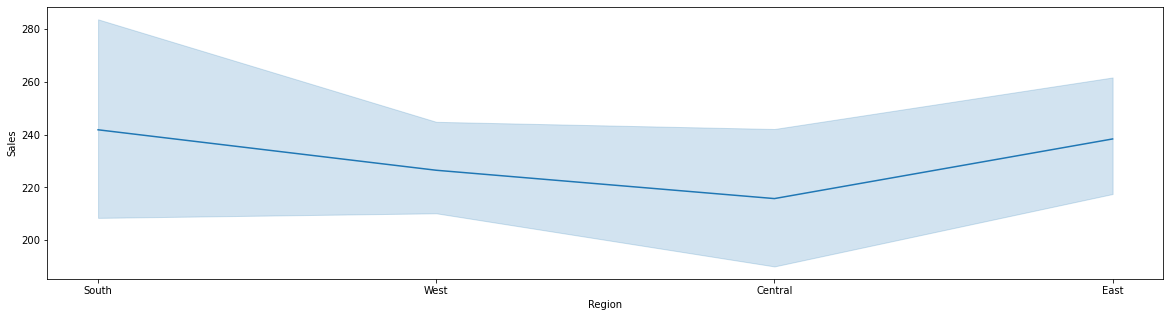

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Region',y='Sales',data=data)

Least sales made in Central region

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

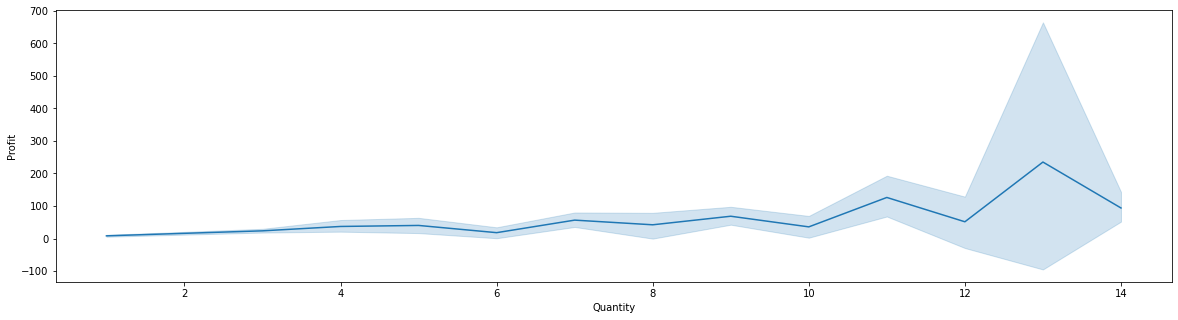

In [27]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Quantity',y='Profit',data=data)

Greater the quantity, more was the profit

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

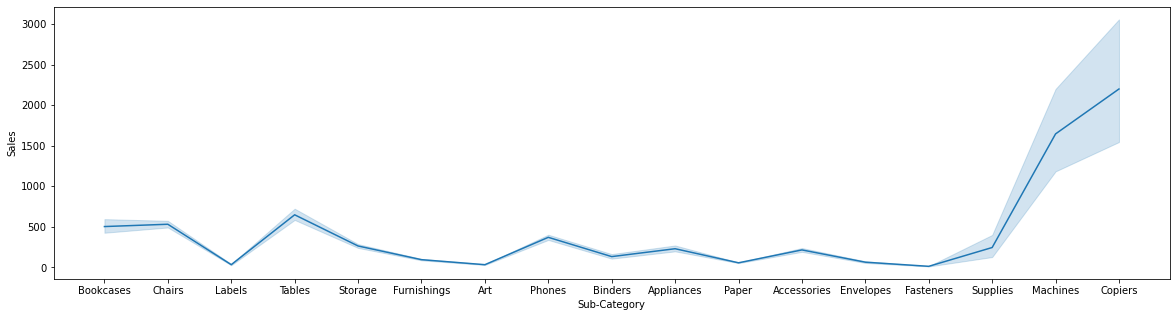

In [28]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Sub-Category',y='Sales',data=data)

For copiers, sum of sales was maximum

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

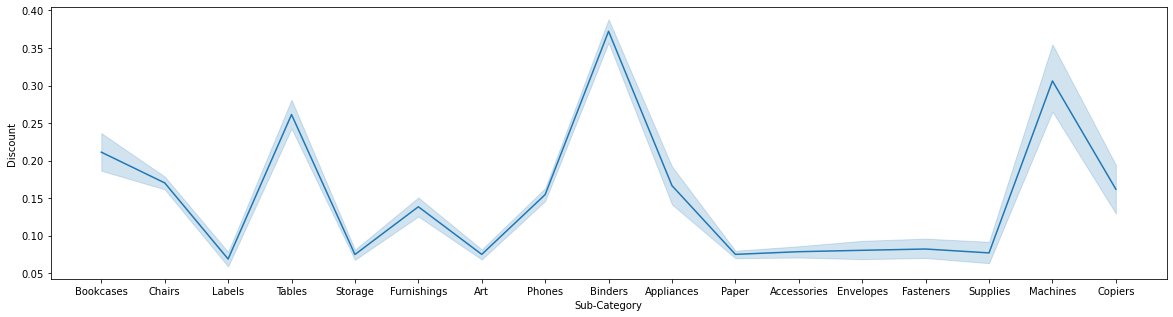

In [29]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Sub-Category',y='Discount',data=data)

Most discount was given for Binders and Machines

<AxesSubplot:xlabel='Sales', ylabel='Region'>

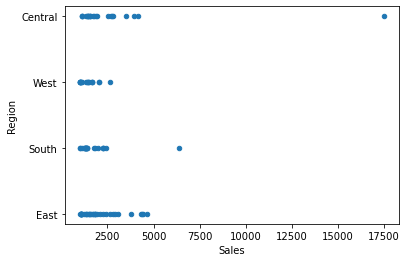

In [31]:
data[data['Sales'] > 1000].sample(100).plot.scatter(x='Sales', y='Region')

Most sales were made between 2500-5000.

<AxesSubplot:xlabel='Sales', ylabel='Quantity'>

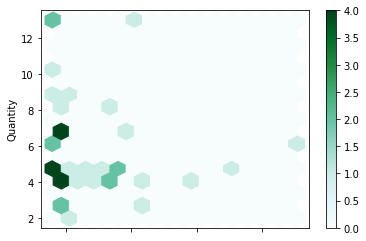

In [61]:
data[data['Sales'] > 4000].plot.hexbin(x='Sales', y='Quantity', gridsize=15)

For quantity between 4 to 6, sum of sales was maximum.

<AxesSubplot:xlabel='Region', ylabel='count'>

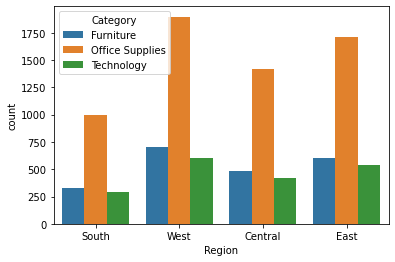

In [62]:
sns.countplot(x='Region',hue="Category",data=data)

West made most sales in all 3 categories.

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

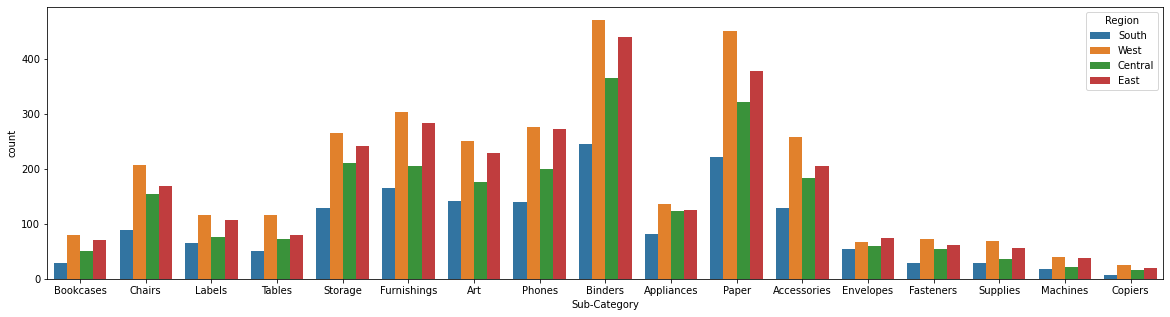

In [63]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Sub-Category',hue="Region",data=data)

Binders were the most demanded in all 4 regions.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

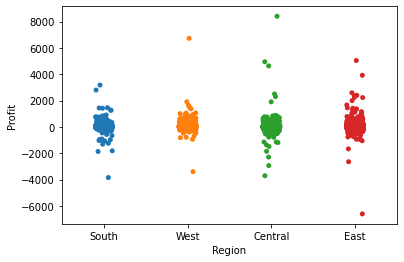

In [64]:
sns.stripplot(x=data['Region'],y=data['Profit'])

Usually profit lies between -2000 to 2000.

<AxesSubplot:xlabel='Sales', ylabel='Category'>

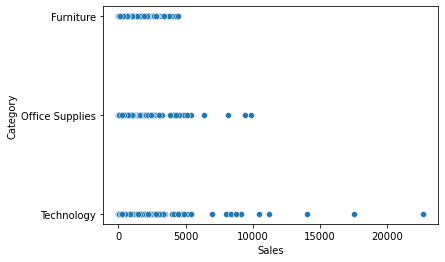

In [65]:
sns.scatterplot(x=data['Sales'],y=data['Category'])

Technology sales were most irregular.

<AxesSubplot:xlabel='Profit', ylabel='Category'>

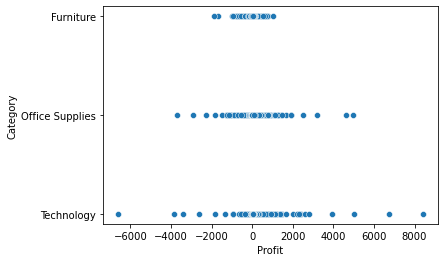

In [66]:
sns.scatterplot(x=data['Profit'],y=data['Category'])

Tech profit was the most irregular.

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

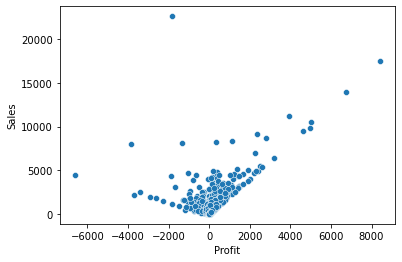

In [67]:
sns.scatterplot(x=data['Profit'],y=data['Sales'])

1. Unbalanced dataset.
2. Many outliers.
3. Profit increases with sales.

<AxesSubplot:xlabel='Category', ylabel='Sales'>

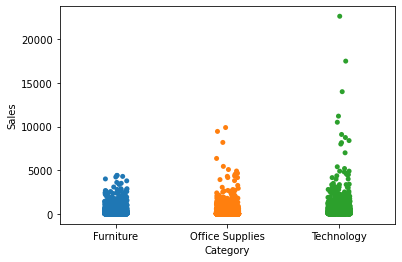

In [68]:
sns.stripplot(x=data['Category'],y=data['Sales'])

Irregular sales in technology

<AxesSubplot:ylabel='Profit'>

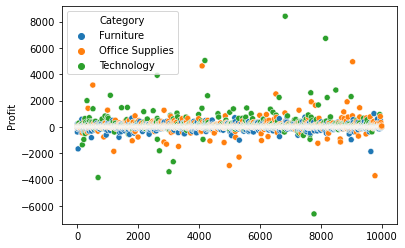

In [69]:
sns.scatterplot(x=data.index,y=data['Profit'],hue=data['Category'])

Most regular- Furniture
Irregular- Technology
Unbalanced data

<AxesSubplot:ylabel='Profit'>

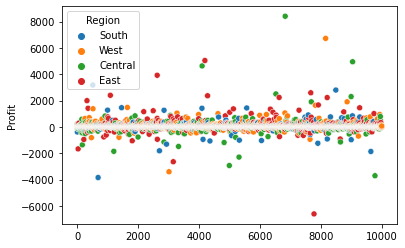

In [70]:
sns.scatterplot(x=data.index,y=data['Profit'],hue=data['Region'])

Unbalanced data
Profit of regions lie between -2000 to 2000

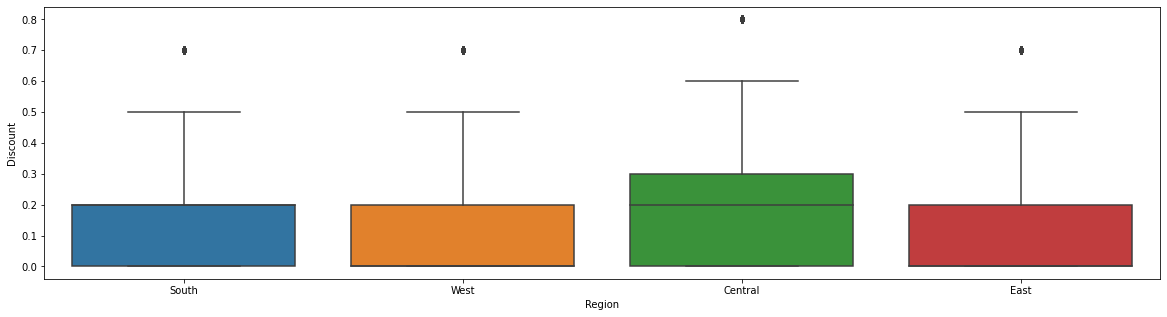

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Region',y='Discount',data=data)
plt.show()

Maximum discount for central region

In [60]:
fig=px.pie(data,values='Profit',names='Sub-Category',title='Sales wrt Sub-Category')
fig.show()

Binders made the most profit.

Multivariate Analysis

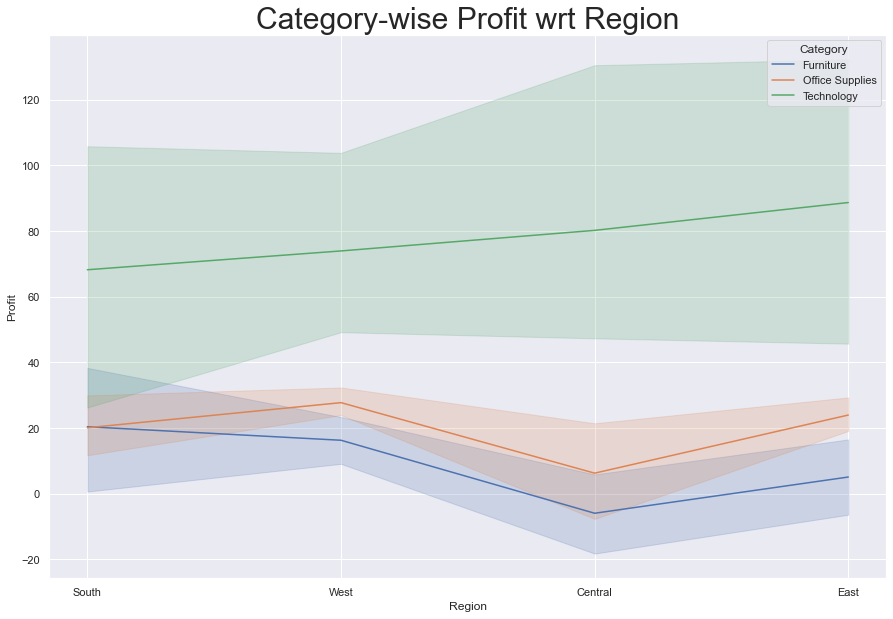

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot(x=data['Region'],y=data['Profit'],hue=data['Category'])
plt.title('Category-wise Profit wrt Region',fontsize='30')
plt.show()

Technology made way more profit than others in all the regions, followed by Office supplies.

In [111]:
fig=px.histogram(data,x='Category',y='Sales',color='Discount')
fig.show()

Profit varies highly with discount. No matter if discount was more, sum of sales was still highest when discount was less than 0.2

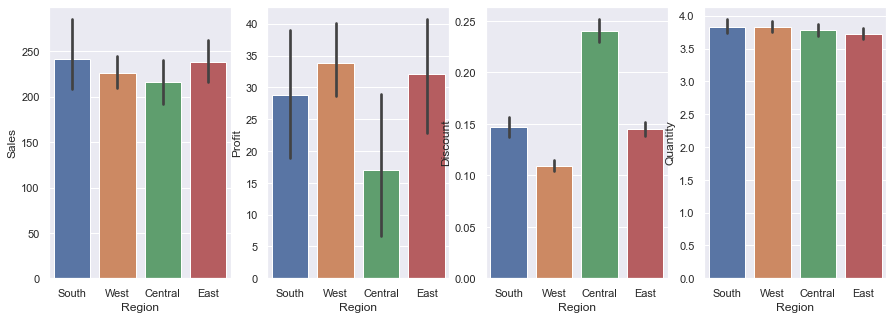

In [78]:
fig,axes=plt.subplots(1,4,figsize=(15,5))
sns.barplot(ax=axes[0],x=data['Region'],y=data['Sales'])
sns.barplot(ax=axes[1],x=data['Region'],y=data['Profit'])
sns.barplot(ax=axes[2],x=data['Region'],y=data['Discount'])
sns.barplot(ax=axes[3],x=data['Region'],y=data['Quantity'])
plt.show()


South-most number of sales
West-most profit
Central-most discount
Quantity-almost same for all regions

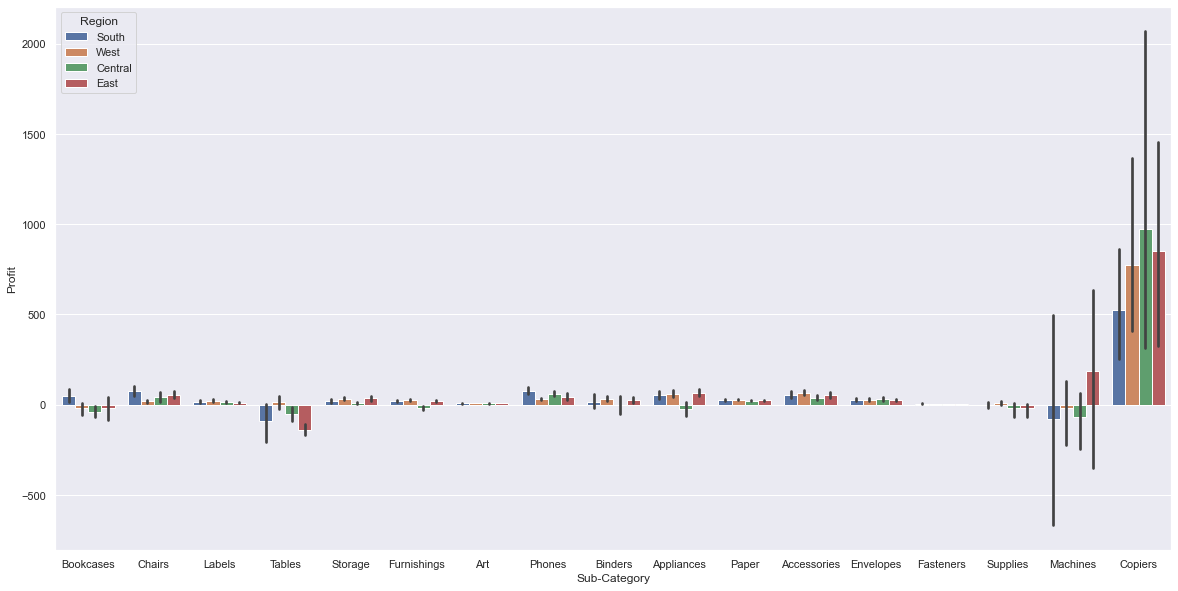

In [86]:
plt.figure(figsize=(20,10))
sns.barplot(x=data['Sub-Category'],y=data['Profit'],hue='Region',data=data)
plt.show()

Copiers made most profit in all regions

In [89]:
data.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.011644,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.011644,1.000000,-0.022346,0.013376,0.057243,-0.028751
Sales,-0.001359,-0.022346,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.013376,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.057243,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.028751,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

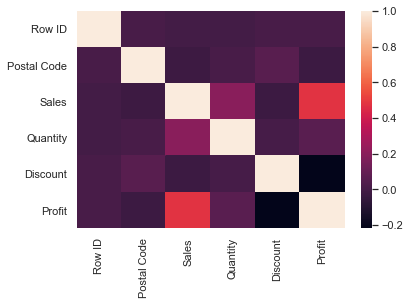

In [90]:
sns.heatmap(data.corr())

Conclusions-
1. The dataset is very imbalanced.
2. Copiers made most profit in all regions.
3. Technology made way more profit than other categories.
4. Most sales were made with no discount.
5. Even though discount was more, it didn't affect the number of sales.
6. Most number of sales in South region.
7. Most profit made in West region.
8. William Brown is the most loyal customer.
9. Most number of sales were made in New York City.
10. Most number of sales were made in California State.